<a href="https://colab.research.google.com/github/vicksCoghi/data_Manual/blob/main/matplotPart2aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')


In [39]:
#Carregando o dataset
dados = pd.read_csv('/content/Dados-Pesquisa.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Imprimir o cabeçalho
dados.head()

In [ ]:
dados.shape #quantidade de linhas e colunas

(15620, 113)

In [ ]:
dados.columns.to_list()

In [ ]:
df2 = dados.copy()

In [ ]:
dados.isna().sum()

In [40]:
dados.isna().sum().sum()

1183948

In [41]:
dados.dropna(subset = ['Age'], inplace = True)

In [42]:
dados.isna().sum().sum()

994850

In [ ]:
dados.isna().mean()

In [ ]:
print('A base de dados apresenta {} linha e {} colunas'.format(dados.shape[0], dados.shape[1]))

In [ ]:
dados.dtypes.value_counts()

In [ ]:
# Criando um novo Data Frame apenas com colunas que queremos :
dados = dados[['Age','Gender','JobPref','JobRoleInterest','EmploymentField','JobRelocateYesNo','HoursLearning', 'MoneyForLearning']]
dados

In [ ]:
dados.drop_duplicates() # deleta valores duplicados, tira erros de duplicação

In [ ]:
dados.describe() #Resumo estatístico do Dataset

In [ ]:
dados.describe(include = 'O') # Resumo estatístico de dados qualitativos

# **Análise de** **Idade**

In [ ]:
dados.loc[dados['Age'] > 30]

In [ ]:
dados.Age.unique()

In [ ]:
# Qual a distribuição de idade dos participantes da pesquisa ?
# Váriavel Age
idade = dados.Age # dados['Age']

# Histograma
plt.hist(idade,label ='Idades', color= 'lightseagreen')
plt.title('Distribuição por Idade')
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

**Análise de** **Gênero**

In [ ]:
dados.Gender.value_counts()

In [ ]:
dados.Gender.value_counts().sum()

In [70]:
tipos_de_genero = pd.DataFrame(dados.Gender.value_counts())

In [ ]:
tipos_de_genero.head()

In [72]:
tipos_de_genero.columns.name = 'Tipo'

In [ ]:
tipos_de_genero.head()

In [ ]:
tipos_de_genero.iloc[0] #pelo índice

In [ ]:
# Selecionando linha female e tirando a porcentagem

In [ ]:
feminino = tipos_de_genero.iloc[1]
feminino

In [ ]:
total_genero = dados.Gender.value_counts().sum()
total_genero

In [ ]:
fem = (feminino / total_genero*100)
fem

In [ ]:
dados.groupby('Gender').mean()

In [82]:
genero = dados.Gender.value_counts()

In [ ]:
plt.pie(genero)

In [ ]:
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index)
plt.show()

In [ ]:
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index, bbox_to_anchor=(1,1)) #bbox = Ajuste de legenda 
plt.show()

**Distribuição de Interesses**

In [ ]:
# Quais são os principais interesses dos participantes da pesquisa ?
# Váriavel JobRoleInterest
dados.JobRoleInterest.value_counts()


In [ ]:
interesses = dados.JobRoleInterest.value_counts()
interesses.plot(kind='bar')

In [ ]:
#Gráfico de Pizza

plt.pie(interesses)
plt.legend(interesses.index,bbox_to_anchor=(1,0.9))
plt.show


In [ ]:
plt.pie(interesses, startangle = 90)
plt.legend(interesses.index,bbox_to_anchor=(1,0.9))
plt.show

**Preferências de Trabalho por Idade**

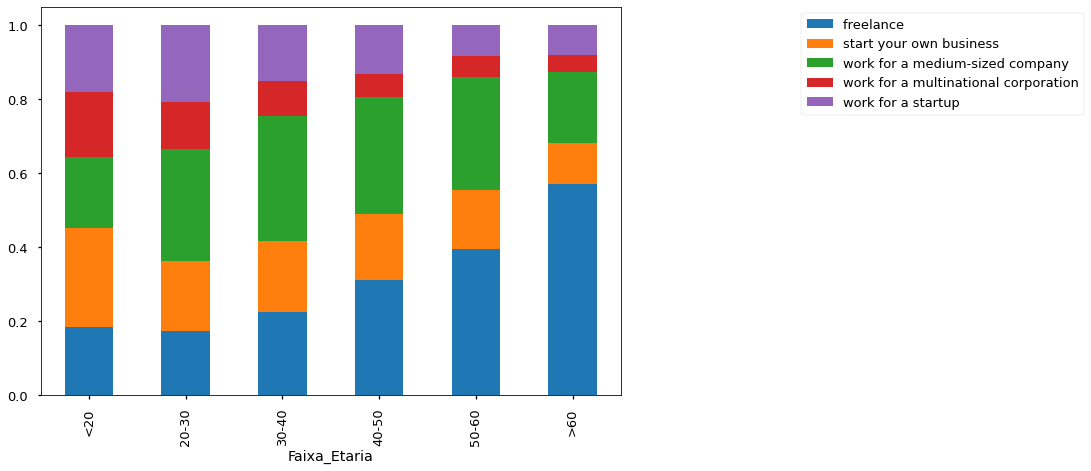

In [94]:
#Agrupando os dados

dados2 = dados.copy()
bins = [0,20,30,40,50,60,100]

#Criar uma coluna 'Faixa_Etaria' e inserir as colunas 'Age' com os labels apropriados
dados2['Faixa_Etaria'] = pd.cut(dados2['Age'],
                                bins,
                                labels = ['<20','20-30','30-40','40-50','50-60','>60'])
# Cruzar os dados de "Faixa_Etaria" com o JobPref
df2 = pd.crosstab(dados2['Faixa_Etaria'],dados2['JobPref']).apply(lambda r : r/r.sum(),axis = 1)

# Grafico de barras empilhado
df2.plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()